In [19]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from numpy import mean,std
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('../Datasets/telecommunications_churn.csv',sep=';')
X = data.drop(labels='churn',axis=1)
y = data[['churn']]
X.shape,y.shape

((3333, 18), (3333, 1))

In [3]:
tsne = TSNE(n_components=2).fit_transform(X,y)

In [6]:
tsne.shape

(3333, 2)

In [8]:
data_new = pd.DataFrame(tsne,columns=['x1','x2'])
data_new.head()

,x1,x2
0,-29.970463,-38.685432
1,-10.993760,26.954597
2,51.940029,-22.283215
3,57.846115,-25.273182
4,34.714718,4.582280


In [20]:
std_sclr = StandardScaler()
data_new = pd.DataFrame(data_new)
data_new.columns=['x1','x2']

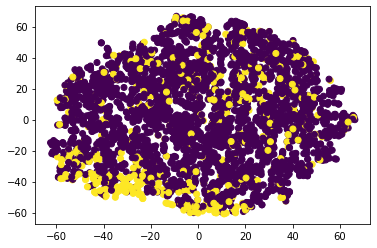

In [21]:
plt.scatter(x='x1',y='x2',data=data_new,c=y.squeeze())
plt.show()

In [22]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=12)

scores = cross_val_score(SVC(),data_new,y,cv=cv,scoring='accuracy',n_jobs=-1,error_score='raise')
print(mean(scores),std(scores))

0.8643889398380419 0.00867006767583696


In [23]:
scores = cross_val_score(RandomForestClassifier(),data_new,y,cv=cv,scoring='accuracy',n_jobs=-1,error_score='raise')
print(mean(scores),std(scores))


0.8682928437419457 0.015210927166709383


In [24]:
scores = cross_val_score(DecisionTreeClassifier(),data_new,y,cv=cv,scoring='accuracy',n_jobs=-1,error_score='raise')
print(mean(scores),std(scores))

0.8089859320398243 0.021066989906255412
